In [97]:









import datetime
import pytz
import math
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta













In [98]:








# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1










In [99]:








def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        










In [100]:










## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))












In [101]:





df = getQuotes(frameM30, 2023)
df








,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
7424,1691164800,1.09884,1.10232,1.09860,1.10206,10480,8,0
7425,1691166600,1.10208,1.10295,1.10109,1.10119,8040,8,0
7426,1691168400,1.10119,1.10249,1.10021,1.10166,7078,8,0
7427,1691170200,1.10166,1.10280,1.10156,1.10230,5649,8,0


In [102]:


def calculateHull(df, period = 200):
    df[f'LWMA-{period}'] = ta.wma(df['close'], length=period)
    halvedPeriod = period // 2
    rootedPeriod = int(math.sqrt(period))
    df[f'LWMA-{halvedPeriod}'] = ta.wma(df['close'], length=halvedPeriod)
    df[f'2 * (LWMA-{halvedPeriod})'] = 2 * df[f'LWMA-{halvedPeriod}']
    df[f'2 * (LWMA-{halvedPeriod}) - LWMA-{period}']  = df[f'2 * (LWMA-{halvedPeriod})'] - df[f'LWMA-{period}']
    df[f'HMA-{period}'] = ta.wma(df[f'2 * (LWMA-{halvedPeriod}) - LWMA-{period}'], length=rootedPeriod)
    return df





In [103]:


hullShortPeriod = 200
hullLongPeriod = 500

df = calculateHull(df, hullShortPeriod)
df = calculateHull(df, hullLongPeriod)



In [104]:


df



,time,open,high,low,close,tick_volume,spread,real_volume,LWMA-200,LWMA-100,2 * (LWMA-100),2 * (LWMA-100) - LWMA-200,HMA-200,LWMA-500,LWMA-250,2 * (LWMA-250),2 * (LWMA-250) - LWMA-500,HMA-500
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7424,1691164800,1.09884,1.10232,1.09860,1.10206,10480,8,0,1.095479,1.094599,2.189198,1.093719,1.093322,1.099177,1.096152,2.192304,1.093127,1.093141
7425,1691166600,1.10208,1.10295,1.10109,1.10119,8040,8,0,1.095522,1.094734,2.189468,1.093946,1.093415,1.099173,1.096180,2.192360,1.093187,1.093140
7426,1691168400,1.10119,1.10249,1.10021,1.10166,7078,8,0,1.095571,1.094878,2.189756,1.094185,1.093531,1.099170,1.096211,2.192422,1.093252,1.093146
7427,1691170200,1.10166,1.10280,1.10156,1.10230,5649,8,0,1.095626,1.095034,2.190067,1.094441,1.093672,1.099170,1.096247,2.192494,1.093325,1.093158


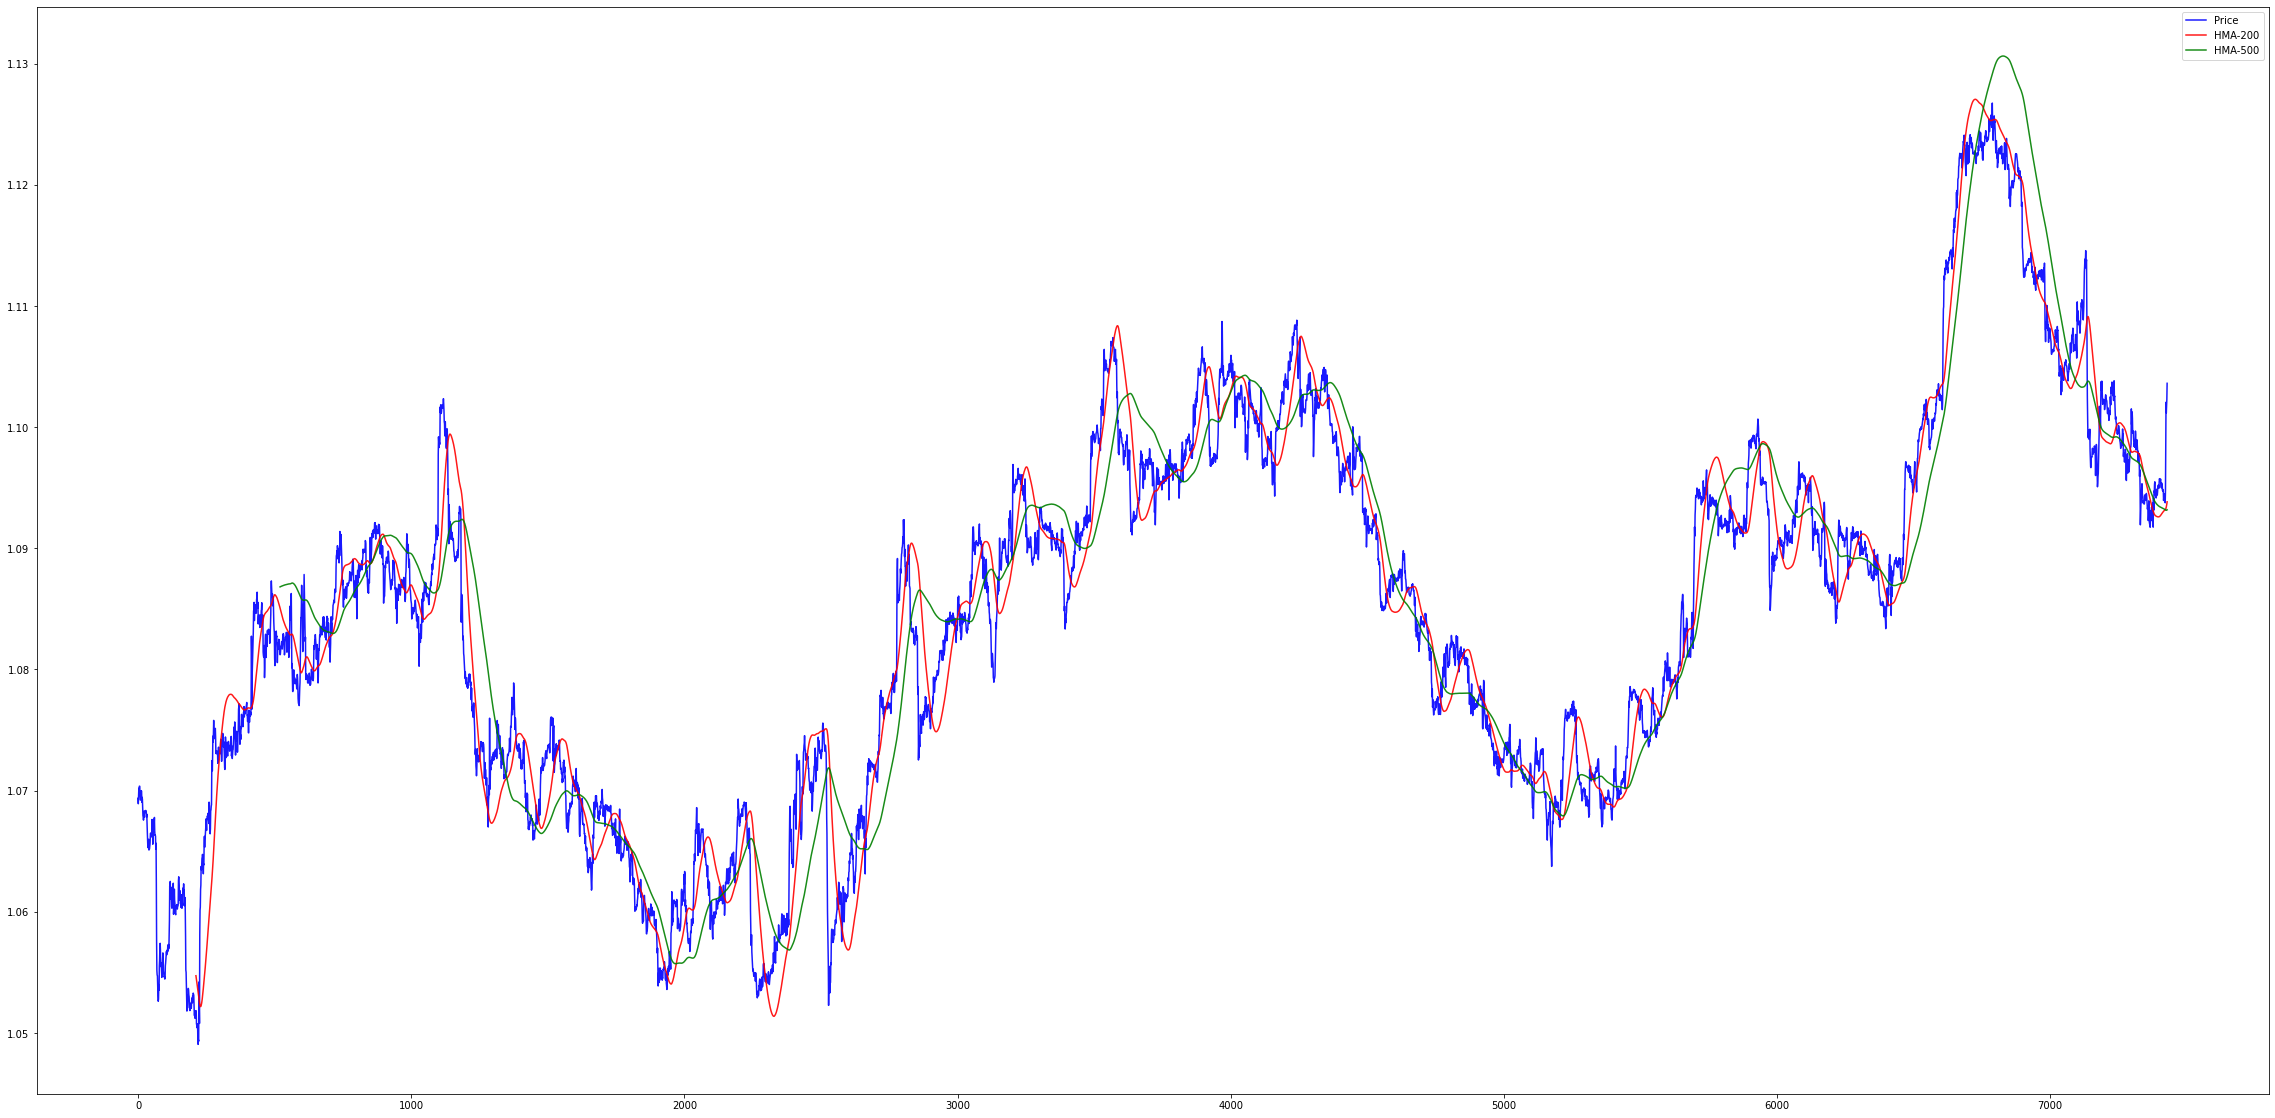

In [105]:




## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)

## Plotting the SMAs
plt.plot(df[f'HMA-{hullShortPeriod}'], label=f'HMA-{hullShortPeriod}', c='red', alpha=0.9)
plt.plot(df[f'HMA-{hullLongPeriod}'], label=f'HMA-{hullLongPeriod}', c='green', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()





